# Data Investigation - Bikes

### Import Data

> starting from trips dataset cleaned in 'Data Investigation - Trips'

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [9]:
print('Loading Trip Data...')

try:
    trip_data = pd.DataFrame()
    file = '../clean_data/trip_data_cleaned_master.csv'
    chunks = []
    counter = 1
    chunksize = 10000
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

    # import file in chunks
    for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True, parse_dates=['start_date', 'end_date']):

        # append chunk to chunks list
        chunks.append(chunk)

        if counter == 1 or counter % 10 == 0 or counter == num_chunks:
            print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), counter, num_chunks))
        counter += 1

    # concat chunks
    trip_data = pd.concat(chunks)

    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')

Loading Trip Data...
	[12:56:42.568398] finished chunk 1 of 96
	[12:56:43.413905] finished chunk 10 of 96
	[12:56:44.317774] finished chunk 20 of 96
	[12:56:45.232995] finished chunk 30 of 96
	[12:56:46.146126] finished chunk 40 of 96
	[12:56:47.084962] finished chunk 50 of 96
	[12:56:48.006289] finished chunk 60 of 96
	[12:56:48.942410] finished chunk 70 of 96
	[12:56:49.869756] finished chunk 80 of 96
	[12:56:50.789422] finished chunk 90 of 96
	[12:56:51.296959] finished chunk 96 of 96
Data Loaded Successfully!


In [10]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955557 entries, 0 to 955556
Data columns (total 26 columns):
Unnamed: 0            955557 non-null int64
trip_id               955557 non-null int64
duration              955557 non-null int64
start_date            955557 non-null datetime64[ns]
start_station_name    955557 non-null object
start_terminal        955557 non-null int64
end_date              955557 non-null datetime64[ns]
end_station_name      955557 non-null object
end_terminal          955557 non-null int64
bike_id               955557 non-null int64
user_type             955557 non-null object
user_zip              955557 non-null int64
duration_minutes      955557 non-null float64
start_area            955557 non-null object
end_area              955557 non-null object
start_zip             955557 non-null int64
end_zip               955557 non-null int64
max_temp              955507 non-null float64
mean_temp             955507 non-null float64
min_temp              95

In [11]:
trip_data.head(3)

,Unnamed: 0,trip_id,duration,start_date,start_station_name,start_terminal,end_date,end_station_name,end_terminal,bike_id,...,end_zip,max_temp,mean_temp,min_temp,max_wind,mean_wind,max_gust,precipitation,cloud_cover,events
0,0,4069,174,2013-08-29 09:08:00,2nd at South Park,64,2013-08-29 09:11:00,2nd at South Park,64,288,...,94107,74.0,68.0,61.0,23.0,11.0,28.0,0.0,4.0,NaN
1,1,4073,1067,2013-08-29 09:24:00,South Van Ness at Market,66,2013-08-29 09:42:00,San Francisco Caltrain 2 (330 Townsend),69,321,...,94107,74.0,68.0,61.0,23.0,11.0,28.0,0.0,4.0,NaN
2,2,4074,1131,2013-08-29 09:24:00,South Van Ness at Market,66,2013-08-29 09:43:00,San Francisco Caltrain 2 (330 Townsend),69,317,...,94107,74.0,68.0,61.0,23.0,11.0,28.0,0.0,4.0,NaN


## Isolate Bike Data

In [21]:
bike_data = pd.DataFrame()
bike_data['first_trip'] = trips_data.groupby('bike_id')['start_date'].min()
bike_data['latest_trip']  = trips_data.groupby('bike_id')['start_date'].max()
bike_data['trip_count'] = trips_data.groupby('bike_id')['start_date'].count()
bike_data['days_in_service'] = (bike_data['latest_trip'] - bike_data['first_trip']).dt.days

last_recorded_trip = bike_data.latest_trip.max()
bike_data['days_since_last_trip'] = (last_recorded_trip - bike_data.latest_trip).dt.days

bike_data['total_usage_time_per_trip'] = trips_data.groupby('bike_id')['duration'].sum()
bike_data['median_usage_time_per_trip'] = trips_data.groupby('bike_id')['duration'].median()
bike_data['mean_usage_time_per_trip'] = trips_data.groupby('bike_id')['duration'].mean()

bike_data.head()

,first_trip,latest_trip,trip_count,days_in_service,days_since_last_trip,total_usage_time_per_trip,median_usage_time_per_trip,mean_usage_time_per_trip
bike_id,,,,,,,,
9,2013-08-29 12:02:00,2016-08-19 20:09:00,396,1086,12,215883,424.0,545.159091
10,2013-09-01 13:47:00,2016-08-31 16:53:00,353,1095,0,179512,343.0,508.532578
11,2013-08-29 20:11:00,2016-08-28 09:35:00,252,1094,3,131877,401.5,523.321429
12,2013-08-30 17:15:00,2016-08-31 17:25:00,341,1097,0,198149,330.0,581.082111
13,2013-08-29 10:13:00,2016-08-30 11:01:00,316,1097,1,174435,315.0,552.009494


In [23]:
bike_data.to_csv('../clean_data/bike_data_cleaned.csv', encoding='utf-8')

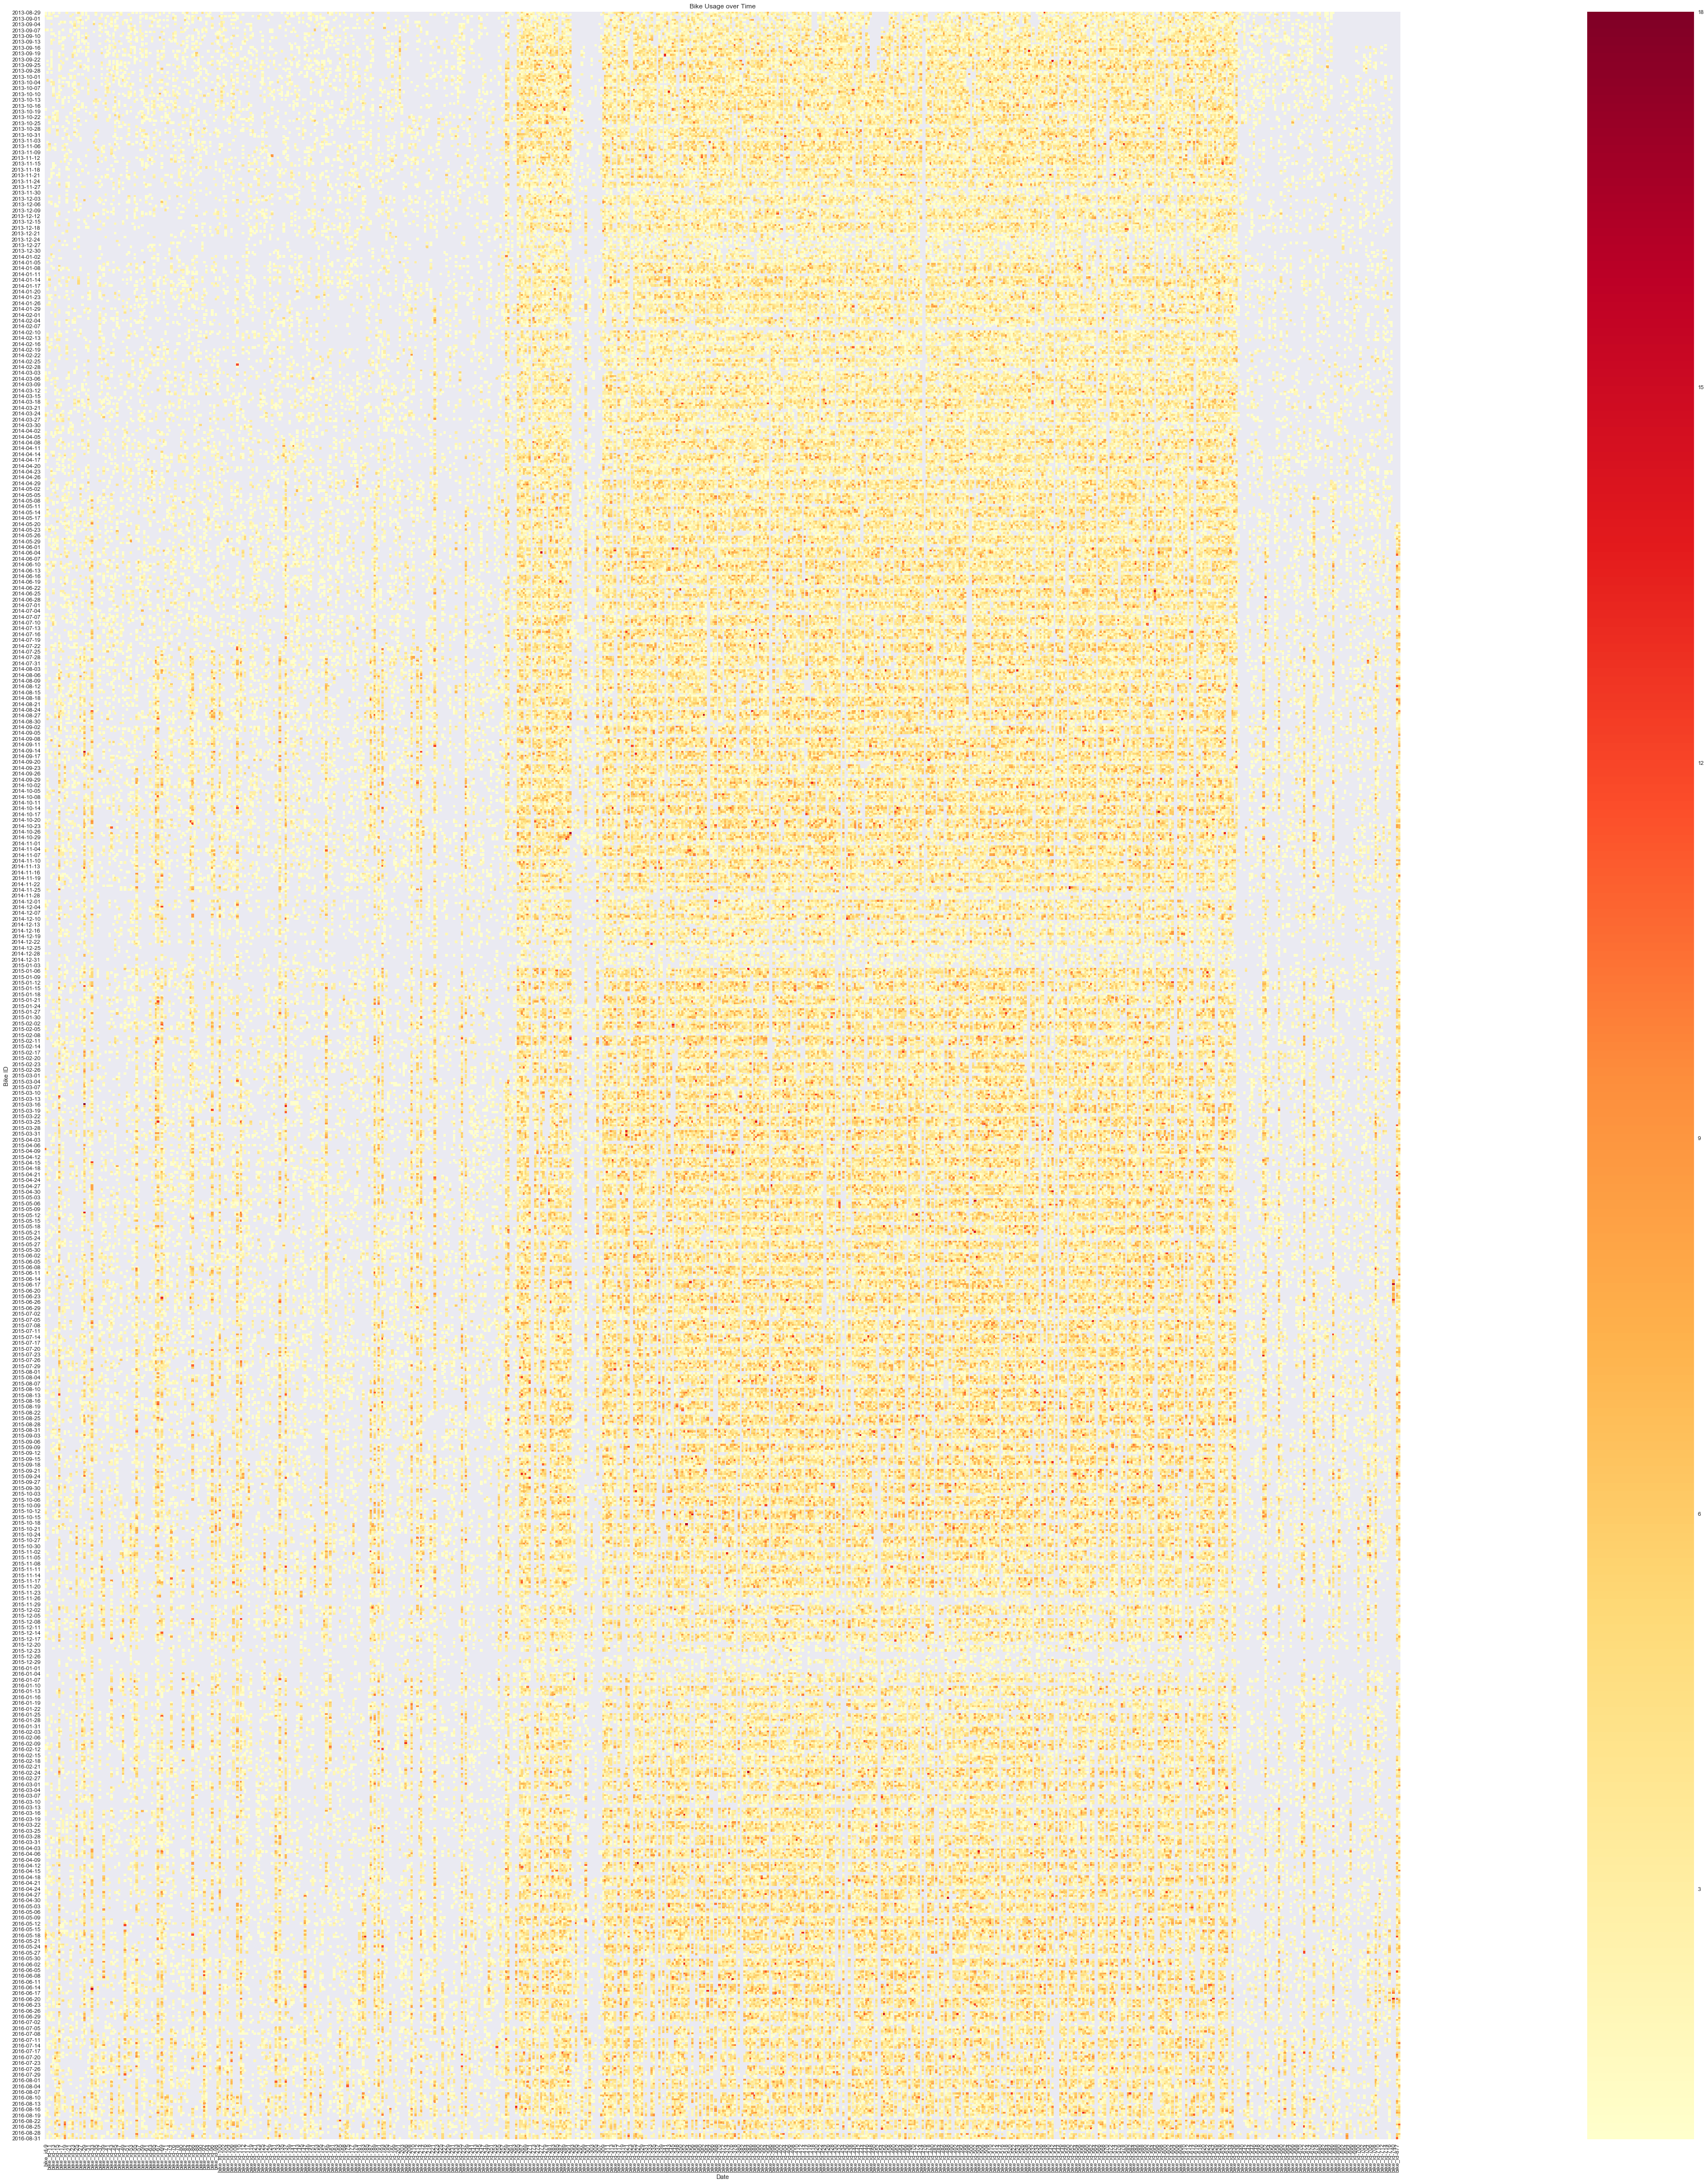

In [24]:
service_days = trips_data.groupby(trips_data['start_date'].dt.date)['bike_id'].value_counts().to_frame()
grid = service_days.unstack()
plt.subplots(figsize=(120,70))
ax = sns.heatmap(grid, square=True, cmap="YlOrRd")
ax.set(ylabel='Bike ID')
ax.set(xlabel='Date')
ax.set(title='Bike Usage over Time')

plt.savefig('../Documents/bike_usage_by_day.png')

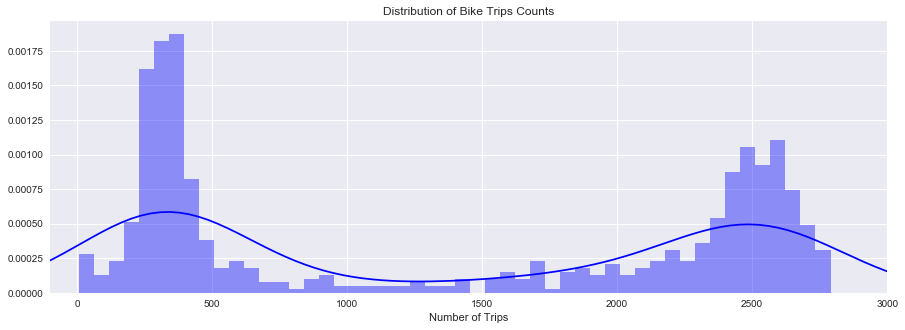

In [25]:
plt.subplots(figsize=(15,5))
sns.distplot(bike_data.trip_count, color='b', bins=50)
plt.title('Distribution of Bike Trips Counts')
plt.xlim(-100, 3000)
plt.xlabel('Number of Trips')
plt.show()

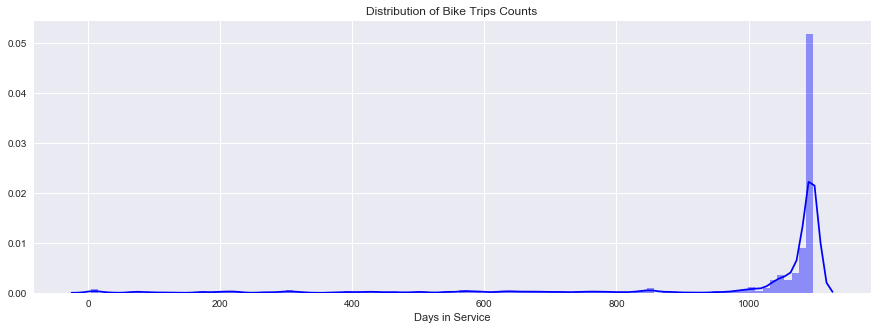

In [26]:
plt.subplots(figsize=(15,5))
sns.distplot(bike_data.days_in_service, color='b', bins=100)
plt.title('Distribution of Bike Trips Counts')
plt.xlabel('Days in Service')
plt.show()

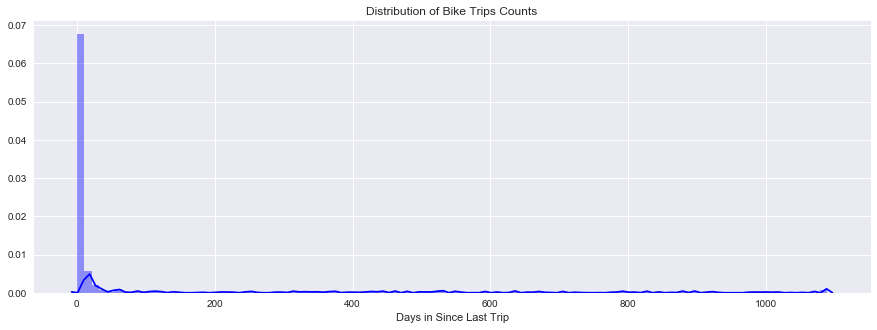

In [27]:
plt.subplots(figsize=(15,5))
sns.distplot(bike_data.days_since_last_trip, color='b', bins=100)
plt.title('Distribution of Bike Trips Counts')
plt.xlabel('Days in Since Last Trip')
plt.show()

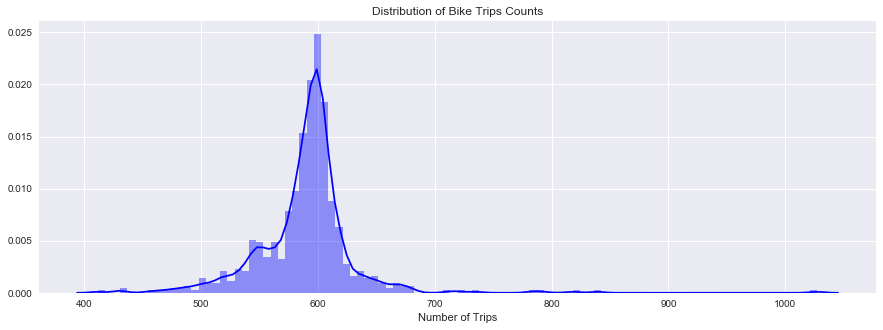

In [28]:
plt.subplots(figsize=(15,5))
sns.distplot(bike_data.mean_usage_time_per_trip, color='b', bins=100)
plt.title('Distribution of Bike Trips Counts')
plt.xlabel('Number of Trips')
plt.show()

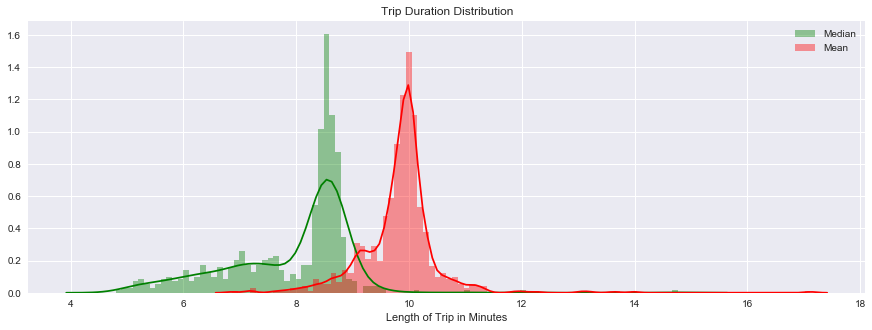

In [29]:
plt.subplots(figsize=(15,5))
ax = sns.distplot(bike_data.median_usage_time_per_trip/60., color='g', bins=100)
sns.distplot(bike_data.mean_usage_time_per_trip/60., color='r', bins=100, ax=ax)
plt.title('Trip Duration Distribution')
plt.xlabel('Length of Trip in Minutes')
plt.legend(['Median', 'Mean'], loc='best')
plt.show()